In [1]:
import pandas as pd
from underthesea import ner
import string
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1. Đọc dữ liệu

In [2]:
data_test=pd.read_csv("/Users/maiphuong/Desktop/Nhóm 7/data/test.csv").dropna()
data_test.head()

,Column1,Column2,Column3,Column4
0,Chị,Ns,B-NP,O
1,Minh,NNP,B-NP,B-PER
2,ôm,V,B-VP,O
3,đứa,Ns,B-NP,O
4,con_gái,N,B-NP,O


In [3]:
tokens_list = []
ner_tags_list = []
ner_idx_list = []

# Tạo mapping từ nhãn NER sang chỉ số
label_to_idx = {
    "O": 8,
    "B-PER": 3,
    "I-PER": 7,
    "B-LOC": 3,
    "I-LOC": 7,
    "B-ORG": 1,
    "I-ORG": 5,
    "B-MISC": 2,
    "I-MISC": 6
}

# Tách các câu và chuyển đổi dữ liệu
tokens = []
ner_tags = []
ner_idx = []

for index, row in data_test.iterrows():
    tokens.append(row['Column1'])
    ner_tags.append(row['Column4'])
    ner_idx.append(label_to_idx.get(row['Column4'], 8))

    if row['Column1'] == '.':
        tokens_list.append(tokens)
        ner_tags_list.append(ner_tags)
        ner_idx_list.append(ner_idx)
        tokens = []
        ner_tags = []
        ner_idx = []

# Nếu còn từ trong danh sách mà chưa gặp dấu chấm, thêm câu vào danh sách
if tokens:
    tokens_list.append(tokens)
    ner_tags_list.append(ner_tags)
    ner_idx_list.append(ner_idx)

# Tạo DataFrame từ các câu đã tách
data_processed = {
    'tokens': tokens_list,
    'ner_tags': ner_tags_list,
    'ner_idx': ner_idx_list
}

df_test = pd.DataFrame(data_processed)

df_test.head()

,tokens,ner_tags,ner_idx
0,"[Chị, Minh, ôm, đứa, con_gái, mới, hơn, hai, t...","[O, B-PER, O, O, O, O, O, O, O, O, O, O, O, O,...","[8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
1,"[Từ, đôi, mắt, thâm_quầng, mệt_mỏi, ,, những, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
2,"[Chỉ, riêng, xã, Cương_Gián, (, Hà_Tĩnh, ), đã...","[O, O, B-LOC, I-LOC, O, B-LOC, O, O, O, O, O, ...","[8, 8, 3, 7, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]"
3,"[Ở, Nghi_Hải, (, Nghệ_An, ), cũng, có, những, ...","[O, B-LOC, O, B-LOC, O, O, O, O, O, O, O, O, O...","[8, 3, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
4,"[Chiều, cuối, thu, ,, trời, vùng_biển, Nghi_Xu...","[O, O, O, O, O, O, B-LOC, O, O]","[8, 8, 8, 8, 8, 8, 3, 8, 8]"


In [16]:
data_train=pd.read_csv("/Users/maiphuong/Desktop/Nhóm 7/data/train_saved (1).csv").dropna()
data_train.head()

,Column1,Column2,Column3,Column4
0,Đó,P,B-NP,O
1,là,V,B-VP,O
2,con,Nc,B-NP,O
3,đường,N,B-NP,O
4,biển,N,B-NP,O


In [17]:
tokens_list = []
ner_tags_list = []
ner_idx_list = []

# Tạo mapping từ nhãn NER sang chỉ số
label_to_idx = {
    "O": 8,
    "B-PER": 3,
    "I-PER": 7,
    "B-LOC": 3,
    "I-LOC": 7,
    "B-ORG": 1,
    "I-ORG": 5,
    "B-MISC": 2,
    "I-MISC": 6
}

# Tách các câu và chuyển đổi dữ liệu
tokens = []
ner_tags = []
ner_idx = []

for index, row in data_train.iterrows():
    tokens.append(row['Column1'])
    ner_tags.append(row['Column4'])
    ner_idx.append(label_to_idx.get(row['Column4'], 8))

    if row['Column1'] == '.':
        tokens_list.append(tokens)
        ner_tags_list.append(ner_tags)
        ner_idx_list.append(ner_idx)
        tokens = []
        ner_tags = []
        ner_idx = []

# Nếu còn từ trong danh sách mà chưa gặp dấu chấm, thêm câu vào danh sách
if tokens:
    tokens_list.append(tokens)
    ner_tags_list.append(ner_tags)
    ner_idx_list.append(ner_idx)

# Tạo DataFrame từ các câu đã tách
data_processed = {
    'tokens': tokens_list,
    'ner_tags': ner_tags_list,
    'ner_idx': ner_idx_list
}

df_train = pd.DataFrame(data_processed)
df_train

,tokens,ner_tags,ner_idx
0,"[Đó, là, con, đường, biển, ngắn, nhất, để, đi,...","[O, O, O, O, O, O, O, O, O, O, B-LOC, O, B-LOC...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 8, ..."
1,"[Một, chuyến, hải_trình, xuyên, ba, nước, Mala...","[O, O, O, O, O, O, B-LOC, O, B-LOC, O, B-LOC, ...","[8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 3, 8, 8, 8, 1, ..."
2,"[Ông, còn, nhấn_mạnh, trong, thư_điện_tử, :, “...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
3,"[11, g, ngày, 11-9-2005, -, ngày, kỷ_niệm, bốn...","[O, O, O, O, O, O, O, O, O, O, B-LOC, O, O, O,...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, ..."
4,"[Ở, phi_trường, quốc_tế, Kuala_Lumpur, ,, ngườ...","[O, B-LOC, I-LOC, I-LOC, O, O, O, O, O, O, O, ...","[8, 3, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
...,...,...,...
2129,"[Vì_sao, ?, Lãnh_đạo, Cơ_quan, cảnh_sát, điều_...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
2130,"[Tin, bài, liên_quan, :, Viết, tiếp, về, vụ, a...","[O, O, O, O, O, O, O, O, O, B-PER, I-PER, I-PE...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 7, 7, 8, 8, 3, ..."
2131,"[Bộ_trưởng, ra, toà, làm, nhân_chứng, .]","[O, O, O, O, O, O]","[8, 8, 8, 8, 8, 8]"
2132,"[Chiều, 24-3, ,, bộ_trưởng, Bộ, Nông_nghiệp, v...","[O, O, O, O, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG...","[8, 8, 8, 8, 1, 5, 5, 5, 5, 8, 8, 8, 8, 8, 3, ..."


# 2. Bài 1

In [26]:
from sklearn.model_selection import train_test_split
from underthesea import ner
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [30]:
#Dự đoán nhãn từ dl đầu vào
def predict_ner(text):
    entities = ner(text)
    predicted_tags = [entity[3] for entity in entities]
    return predicted_tags

# Đánh giá mô hình
predicted_labels = []
true_labels = []
    
for idx, row in df_test.iterrows():
    tokens = row['tokens']
    ner_tags = row['ner_tags']  # Đây là nhãn NER
        
    # Dự đoán nhãn thực thể
    predicted_tags = predict_ner(" ".join(tokens))
        
    # Kiểm tra độ dài
    if len(predicted_tags) != len(ner_tags):
        continue  # Bỏ qua các dòng dữ liệu không khớp độ dài
        
    predicted_labels.extend(predicted_tags)
    true_labels.extend(ner_tags)
    
# Đảm bảo số lượng các nhãn thực thể là như nhau
assert len(predicted_labels) == len(true_labels), "Số lượng nhãn thực thể không khớp nhau"
    
    
# Tính toán các độ đo
accuracy1 = accuracy_score(true_labels, predicted_labels)
precision1 = precision_score(true_labels, predicted_labels, average='weighted')
recall1 = recall_score(true_labels, predicted_labels, average='weighted')
f1_1 = f1_score(true_labels, predicted_labels, average='weighted')
    
print(f"accuracy: {accuracy1:.4f}")
print(f"precision: {precision1:.4f}")
print(f"recall: {recall1:.4f}")
print(f"F1-score: {f1_1:.4f}")


accuracy: 0.9626
precision: 0.9882
recall: 0.9626
F1-score: 0.9734


# 3. Bài 2

## CRF

In [20]:
def word2features(doc, i):
    word = doc['tokens'][i]
    features = {
        'word': word,
        'is_first': i == 0,
        'is_last': i == len(doc['tokens']) - 1,
        'is_capitalized': word[0].upper() == word[0] if word else False,
        'is_all_caps': word.upper() == word if word else False,
        'is_all_lower': word.lower() == word if word else False,
        'prefix-1': word[:1] if word else '',
        'prefix-2': word[:2] if word else '',
        'prefix-3': word[:3] if word else '',
        'suffix-1': word[-1:] if word else '',
        'suffix-2': word[-2:] if word else '',
        'suffix-3': word[-3:] if word else '',
        'prev_word': '' if i == 0 else doc['tokens'][i - 1],
        'next_word': '' if i == len(doc['tokens']) - 1 else doc['tokens'][i + 1],
    }
    return features

def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc['tokens']))]

def get_labels(doc):
    return doc['ner_tags']

X_train = [extract_features(doc) for _, doc in df_train.iterrows()]
y_train = [get_labels(doc) for _, doc in df_train.iterrows()]

X_test = [extract_features(doc) for _, doc in df_train.iterrows()]
y_test = [get_labels(doc) for _, doc in df_train.iterrows()]


In [21]:
from sklearn_crfsuite import CRF

# Khởi tạo mô hình CRF
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False
)

# Huấn luyện mô hình CRF
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_transitions=False, c1=0.1, c2=0.1,
    max_iterations=100)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

y_pred = crf.predict(X_test)

# Chuyển đổi nhãn dữ liệu sang dạng số
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)
y_pred_bin = mlb.transform(y_pred)

# Classification report
report = classification_report(y_test_bin, y_pred_bin, target_names=mlb.classes_)
print(report)

# Đánh giá kết quả
accuracy2 = accuracy_score(y_test_bin, y_pred_bin)
precision2 = precision_score(y_test_bin, y_pred_bin, average='weighted')
recall2 = recall_score(y_test_bin, y_pred_bin, average='weighted')
f1_2 = f1_score(y_test_bin, y_pred_bin, average='weighted')

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1-score: {f1_2:.4f}")

              precision    recall  f1-score   support

       B-LOC       1.00      1.00      1.00       494
      B-MISC       1.00      1.00      1.00        27
       B-ORG       1.00      1.00      1.00       155
       B-PER       1.00      1.00      1.00       873
       I-LOC       1.00      1.00      1.00       247
      I-MISC       1.00      1.00      1.00        27
       I-ORG       1.00      1.00      1.00       128
       I-PER       1.00      1.00      1.00       291
           O       1.00      1.00      1.00      2134

   micro avg       1.00      1.00      1.00      4376
   macro avg       1.00      1.00      1.00      4376
weighted avg       1.00      1.00      1.00      4376
 samples avg       1.00      1.00      1.00      4376

Accuracy: 0.9986
Precision: 0.9995
Recall: 0.9995
F1-score: 0.9995


# 4. Vẽ biểu đồ

In [24]:
import matplotlib.pyplot as plt

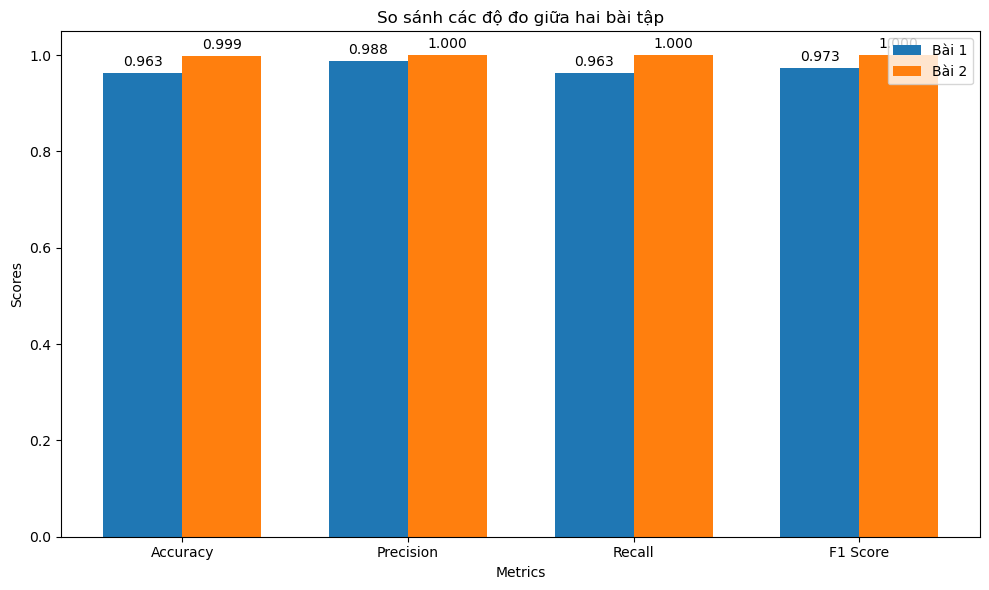

In [32]:
# Danh sách các độ đo và giá trị tương ứng cho từng bài tập
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values1 = [accuracy1, precision1, recall1, f1_1]
values2 = [accuracy2, precision2, recall2, f1_2]

# Vẽ biểu đồ
x = range(len(metrics))
width = 0.35  # Độ rộng của các cột

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x, values1, width=width, label='Bài 1', align='center')
bars2 = ax.bar([i + width for i in x], values2, width=width, label='Bài 2', align='center')

# Đặt tên cho các trục và tiêu đề
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('So sánh các độ đo giữa hai bài tập')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

# Thêm chỉ số độ đo trên các cột
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
